### PSATJIRA

In [1]:
from data_import import *
from data_analysis import *
from prediction import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

### Importing data

In [2]:
ts_dict = import_precipitation_ts()
plants = get_plants()
plant_on_analysis = "PSATJIRA"

### Data Analysis


In [3]:
#precipitation_plots(ts_dict, plant_on_analysis)

In [4]:
#is_stationary(ts_dict, "PSATJIRA")

### Preparing Data for Prediction

In [5]:
df = ts_dict[plant_on_analysis].dropna(axis=0)
X_train, X_test, y_train, y_test= split_train_test_by_size(df)
X_train, X_test = preprocess(X_train, X_test)

### Prediction without cfs and gefs

Evaluation 0:
Train size: 788
Val size: 781
RMSE: 5.829110373260359

Evaluation 1:
Train size: 1569
Val size: 781
RMSE: 5.24156431387523

Evaluation 2:
Train size: 2350
Val size: 781
RMSE: 5.561890850569512

Evaluation 3:
Train size: 3131
Val size: 781
RMSE: 5.793934946662287

Evaluation 4:
Train size: 3912
Val size: 781
RMSE: 5.28649078464353

Evaluation 5:
Train size: 4693
Val size: 781
RMSE: 5.944788037721733

Evaluation 6:
Train size: 5474
Val size: 781
RMSE: 5.678885724720944

Evaluation 7:
Train size: 6255
Val size: 781
RMSE: 5.586312103961422

Evaluation 8:
Train size: 7036
Val size: 781
RMSE: 5.747893399856216

Evaluation 9:
Train size: 7817
Val size: 781
RMSE: 5.49340791000555



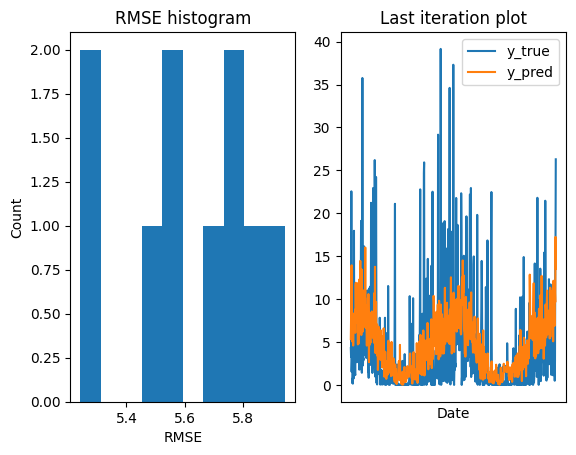

Mean rmse: 5.616427844527678


In [6]:
knn = KNeighborsRegressor(n_neighbors=10)
cross_validation(knn, X_train, y_train)

Evaluation 0:
Train size: 788
Val size: 781
RMSE: 5.518306010848278

Evaluation 1:
Train size: 1569
Val size: 781
RMSE: 5.062634673910411

Evaluation 2:
Train size: 2350
Val size: 781
RMSE: 5.218190592995789

Evaluation 3:
Train size: 3131
Val size: 781
RMSE: 5.5657485124652695

Evaluation 4:
Train size: 3912
Val size: 781
RMSE: 4.976498831293515

Evaluation 5:
Train size: 4693
Val size: 781
RMSE: 5.588254211963287

Evaluation 6:
Train size: 5474
Val size: 781
RMSE: 5.1666925057726765

Evaluation 7:
Train size: 6255
Val size: 781
RMSE: 5.148729449441388

Evaluation 8:
Train size: 7036
Val size: 781
RMSE: 5.443347268001996

Evaluation 9:
Train size: 7817
Val size: 781
RMSE: 5.0143885716541075



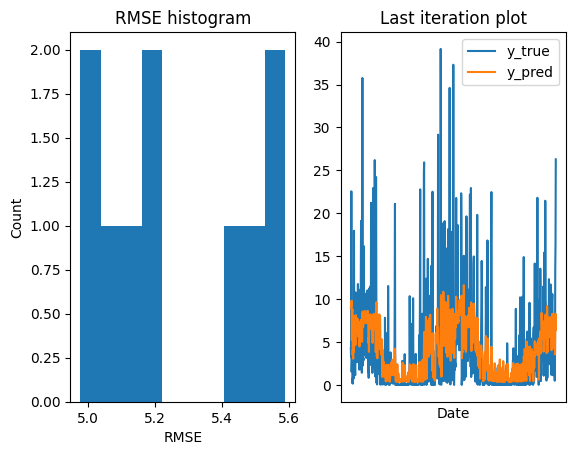

Mean rmse: 5.270279062834671


In [7]:
rf = RandomForestRegressor(n_estimators=20, max_depth=5, criterion="squared_error")
cross_validation(rf, X_train, y_train)

### Prediction with cfs and gefs

In [8]:
dfcg = df.copy()
c = pd.read_csv("../data/ts-PSATJIRA-cfs-model.csv", index_col=[0])
g = pd.read_csv("../data/ts-PSATJIRA-gefs-model.csv", index_col=[0])
dfcg = pd.concat([dfcg, c], axis=1).dropna(axis=0)
dfcg = pd.concat([dfcg, g], axis=1).dropna(axis=0)

In [9]:
X_traincg, X_testcg, y_traincg, y_testcg = split_train_test_by_size(dfcg)
X_traincg, X_testcg = preprocess(X_traincg, X_testcg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE: 7.516494328612892

Evaluation 1:
Train size: 94
Val size: 43
RMSE: 4.438648093205884

Evaluation 2:
Train size: 137
Val size: 43
RMSE: 5.095955993630462

Evaluation 3:
Train size: 180
Val size: 43
RMSE: 3.9848798124604214

Evaluation 4:
Train size: 223
Val size: 43
RMSE: 3.4723525482430846

Evaluation 5:
Train size: 266
Val size: 43
RMSE: 1.095723364016719

Evaluation 6:
Train size: 309
Val size: 43
RMSE: 2.226056933976531

Evaluation 7:
Train size: 352
Val size: 43
RMSE: 3.173929737127542

Evaluation 8:
Train size: 395
Val size: 43
RMSE: 5.0908561064666

Evaluation 9:
Train size: 438
Val size: 43
RMSE: 4.338681307829482



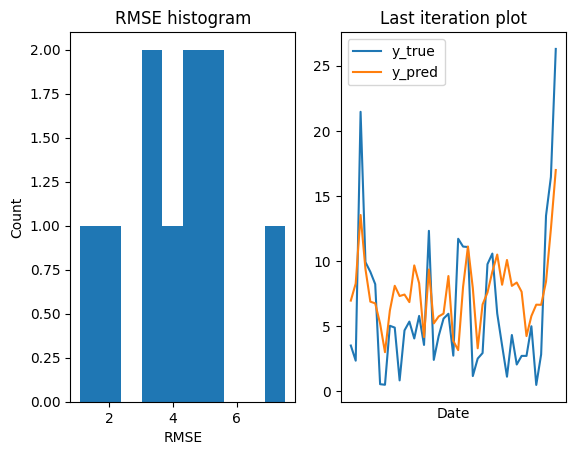

Mean rmse: 4.0433578225569615


In [10]:
knn = KNeighborsRegressor(n_neighbors=10)
cross_validation(knn, X_traincg, y_traincg)

Evaluation 0:
Train size: 51
Val size: 43
RMSE: 6.752537627156627

Evaluation 1:
Train size: 94
Val size: 43
RMSE: 4.21773327244153

Evaluation 2:
Train size: 137
Val size: 43
RMSE: 3.8019002972958535

Evaluation 3:
Train size: 180
Val size: 43
RMSE: 2.1148590579679682

Evaluation 4:
Train size: 223
Val size: 43
RMSE: 2.075831080464605

Evaluation 5:
Train size: 266
Val size: 43
RMSE: 2.444262610873632

Evaluation 6:
Train size: 309
Val size: 43
RMSE: 1.8944934966495006

Evaluation 7:
Train size: 352
Val size: 43
RMSE: 3.167387333972955

Evaluation 8:
Train size: 395
Val size: 43
RMSE: 3.6083003287955435

Evaluation 9:
Train size: 438
Val size: 43
RMSE: 4.386831940689156



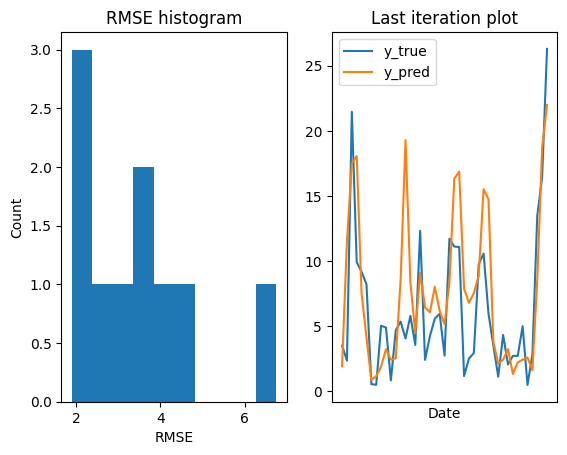

Mean rmse: 3.446413704630737


In [11]:
rf = RandomForestRegressor(n_estimators=40, max_depth=10, criterion="squared_error", random_state=0)
cross_validation(rf, X_traincg, y_traincg)